# Combined Recent Surveys
This notebook make predictions for the combined features and cross border predictions.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!pip install world-bank-data==0.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for world-bank-data: filename=world_bank_data-0.1.3-py3-none-any.whl size=11110 sha256=bc357d7490709c263fb423e65c74bd1bcf5b438ad1aeb5e679a20b38f4636115
  Stored in directory: /root/.cache/pip/wheels/fe/17/0c/9ef630351acc5856f4a1814d96bc082eccf1cbbb779fcd1a98
Successfully built world-bank-data


In [8]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/')

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from lib import estimator_util as eu
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string

In [14]:
sns.set_theme()

In [20]:
DATA_PATH = 'drive/MyDrive/data/'
lsms_path = f'{DATA_PATH}/processed/_all_real.csv'
cnn_weights_path = f'{DATA_PATH}/weights/weights_all_countries.csv'
FIGS_PATH = 'drive/MyDrive/figs'

In [15]:
complete_df, all_cols = eu.get_data(lsms_path, cnn_weights_path, DATA_PATH)

## Heatmap for cross country

In [17]:
countries = [["NG"], ["ETH"] ,["TZA"], ["MW"], ["MLI"], ["NER"], ["NG", "ETH", "TZA", "MW", "MLI", "NER"]]
arr = np.zeros((7,7))
for i, country in enumerate(countries):
    X, y = eu.get_recent_features(complete_df, country, all_cols)
    for j, out_country in enumerate(countries):
        X_out, y_out = eu.get_recent_features(complete_df, out_country, all_cols)
        r, _, m = eu.run_ridge_out(X, y, X_out, y_out)
        arr[i,j] = r

In [21]:
def heatmap(data):
    countries = ["Nigeria", "Ethiopia" ,"Tanzania", "Malawi", "Mali", "Niger", "Pooled"]
    df_cm = pd.DataFrame(data, index = countries, columns = countries)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, cbar_kws={'label': r'$r^2$'})
    plt.xlabel("Country trained on")
    plt.ylabel("Country evaluated on")
    ax = plt.gca()
    plt.text(-0.1, 1.1, string.ascii_uppercase[0], size=20, weight='bold', transform=ax.transAxes)
    plt.savefig(f"{FIGS_PATH}/cross_country_pooled.pdf", dpi=600, bbox_inches="tight")

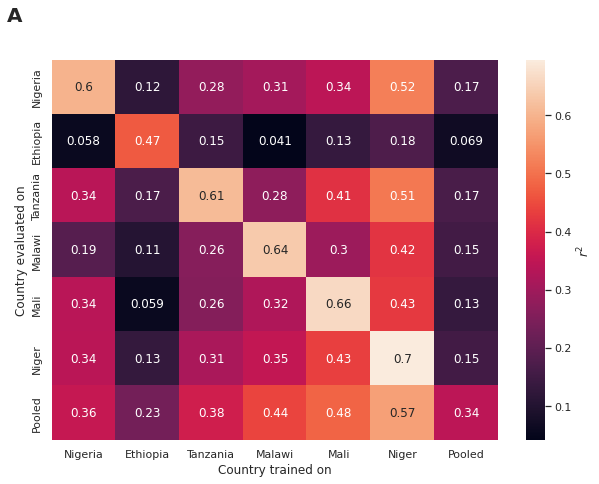

In [22]:
heatmap(arr)

## Pooled Dataset

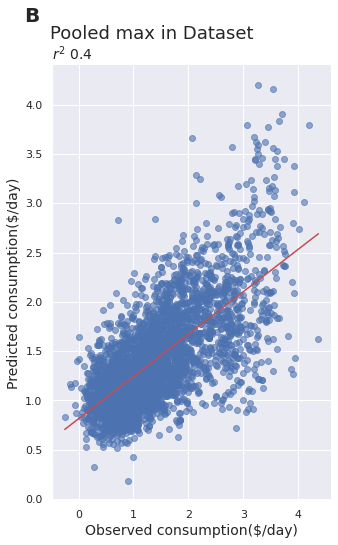

In [24]:
X, y = eu.get_recent_features(complete_df, ["NG", "ETH", "TZA", "MW", "MLI", "NER"], all_cols, scale_cnn=False)
r2, y_hest, model = eu.run_ridge(X, y)
fig = eu.plot_predictions(y, y_hest,r2, "Pooled", "max in Dataset", 1, x_label=True)
plt.savefig(f"{FIGS_PATH}/pooled_max_year.pdf", dpi=600, bbox_inches="tight")